# Olive Data

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# olive 파일 읽기
path = "01_olive.csv"

In [25]:
df=pd.read_csv(path)
df.head(5)

,Unnamed: 0,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,1.North-Apulia,1,1,1075,75,226,7823,672,36,60,29
1,2.North-Apulia,1,1,1088,73,224,7709,781,31,61,29
2,3.North-Apulia,1,1,911,54,246,8113,549,31,63,29
3,4.North-Apulia,1,1,966,57,240,7952,619,50,78,35
4,5.North-Apulia,1,1,1051,67,259,7771,672,50,80,46


In [44]:
# 컬럼이름 변경하기 : 1번 컬럼
df.rename(columns={df.columns[0]:"areaID"},inplace=True)
df.columns

Index(['areaID', 'region', 'area', 'palmitic', 'palmitoleic', 'stearic',
       'oleic', 'linoleic', 'linolenic', 'arachidic', 'eicosenoic'],
      dtype='object')

In [29]:
# region과 area컬럼의 유니크한 값들 확인
print('regions\t', df["region"].unique()) # value_count 쓰면 몇개 있는지까지 알려줌
print('areas\t', df["area"].unique())

regions	 [1 2 3]
areas	 [1 2 3 4 5 6 9 7 8]


# Try)area - region에 관한 crosstab생성하기

In [30]:
pd.crosstab(df["area"],df["region"])

region,1,2,3
area,,,
1,25,0,0
2,56,0,0
3,206,0,0
4,36,0,0
5,0,65,0
6,0,33,0
7,0,0,50
8,0,0,50
9,0,0,51


# Try)데이터 탐색 후 처음컬럼의 숫자 제거(apply - lambda)

In [32]:
df.head()

,areaID,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,1.North-Apulia,1,1,1075,75,226,7823,672,36,60,29
1,2.North-Apulia,1,1,1088,73,224,7709,781,31,61,29
2,3.North-Apulia,1,1,911,54,246,8113,549,31,63,29
3,4.North-Apulia,1,1,966,57,240,7952,619,50,78,35
4,5.North-Apulia,1,1,1051,67,259,7771,672,50,80,46


In [33]:
df["areaID"]=df["areaID"].apply(lambda x :x.split(".")[1])
df.head()

,areaID,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,North-Apulia,1,1,1075,75,226,7823,672,36,60,29
1,North-Apulia,1,1,1088,73,224,7709,781,31,61,29
2,North-Apulia,1,1,911,54,246,8113,549,31,63,29
3,North-Apulia,1,1,966,57,240,7952,619,50,78,35
4,North-Apulia,1,1,1051,67,259,7771,672,50,80,46


# Try) areastring 컬럼의 유니크한 값 확인

In [34]:
df["areaID"].unique()

array(['North-Apulia', 'Calabria', 'South-Apulia', 'Sicily',
       'Inland-Sardinia', 'Coast-Sardinia', 'Umbria', 'East-Liguria',
       'West-Liguria'], dtype=object)

In [10]:
df["areaID"].?()

array(['North-Apulia', 'Calabria', 'South-Apulia', 'Sicily',
       'Inland-Sardinia', 'Coast-Sardinia', 'Umbria', 'East-Liguria',
       'West-Liguria'], dtype=object)

# Try) 산성관련 성분 :'palmitic', 'palmitoleic', 'stearic', 'oleic', 'linoleic', 'linolenic', 'arachidic', 'eicosenoic' 의 칼럼의 데이터만 추려서 subdf생성하기

In [46]:
acidList=["palmitic","palmitoleic","stearic","oleic","linoleic","linolenic","arachidic","eicosenoic"]

dfsub=df[acidList]
dfsub
#dfsub = ?
#df.loc
#dfsub.head()

,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,1075,75,226,7823,672,36,60,29
1,1088,73,224,7709,781,31,61,29
2,911,54,246,8113,549,31,63,29
3,966,57,240,7952,619,50,78,35
4,1051,67,259,7771,672,50,80,46
...,...,...,...,...,...,...,...,...
567,1280,110,290,7490,790,10,10,2
568,1060,100,270,7740,810,10,10,3
569,1010,90,210,7720,970,0,0,2
570,990,120,250,7750,870,10,10,2



# Try) dfsub의 데이터를 모두 0.**인 소수로 나타내기 --> df sub의 모든 칼럼에 /100

In [47]:
# 앞의 데이터 생성과 lambda apply 동시에...
dfsub=dfsub.apply(lambda x: x/100.0)
dfsub.head()


,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,10.75,0.75,2.26,78.23,6.72,0.36,0.60,0.29
1,10.88,0.73,2.24,77.09,7.81,0.31,0.61,0.29
2,9.11,0.54,2.46,81.13,5.49,0.31,0.63,0.29
3,9.66,0.57,2.40,79.52,6.19,0.50,0.78,0.35
4,10.51,0.67,2.59,77.71,6.72,0.50,0.80,0.46


# Try) df에서 acidlist 의 컬럼의 데이터를 위에서 lambda apply로 /100으로 처리한 값들로 치환하기

In [48]:
df[acidList]=dfsub
df.head()

,areaID,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,North-Apulia,1,1,10.75,0.75,2.26,78.23,6.72,0.36,0.60,0.29
1,North-Apulia,1,1,10.88,0.73,2.24,77.09,7.81,0.31,0.61,0.29
2,North-Apulia,1,1,9.11,0.54,2.46,81.13,5.49,0.31,0.63,0.29
3,North-Apulia,1,1,9.66,0.57,2.40,79.52,6.19,0.50,0.78,0.35
4,North-Apulia,1,1,10.51,0.67,2.59,77.71,6.72,0.50,0.80,0.46


# 팔마트산/리놀렐라산의 분포도 그리기[ palmitic, linolenic]

Text(0,0.5,'linolenic')

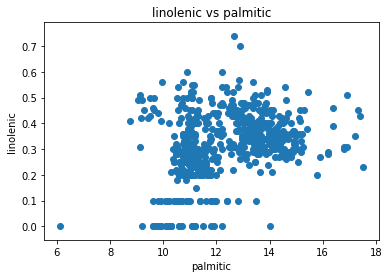

In [14]:
fig=plt.figure()
plt.scatter(df["palmitic"], df["linolenic"])
axis = fig.gca() #get current axis
axis.set_title('linolenic vs palmitic')
axis.set_xlabel('palmitic')
axis.set_ylabel('linolenic')

# palmitic 히스토그램 간단히 그리기

(array([  1.,   0.,  11.,  71., 188.,  79., 131.,  73.,   9.,   9.]),
 array([ 6.1  ,  7.243,  8.386,  9.529, 10.672, 11.815, 12.958, 14.101,
        15.244, 16.387, 17.53 ]),
 <a list of 10 Patch objects>)

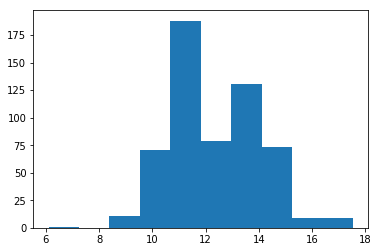

In [15]:
plt.hist(df["palmitic"])

# 앞의 그래프들을 활용하여 비슷한 그래프들에 대한 종류를 비교

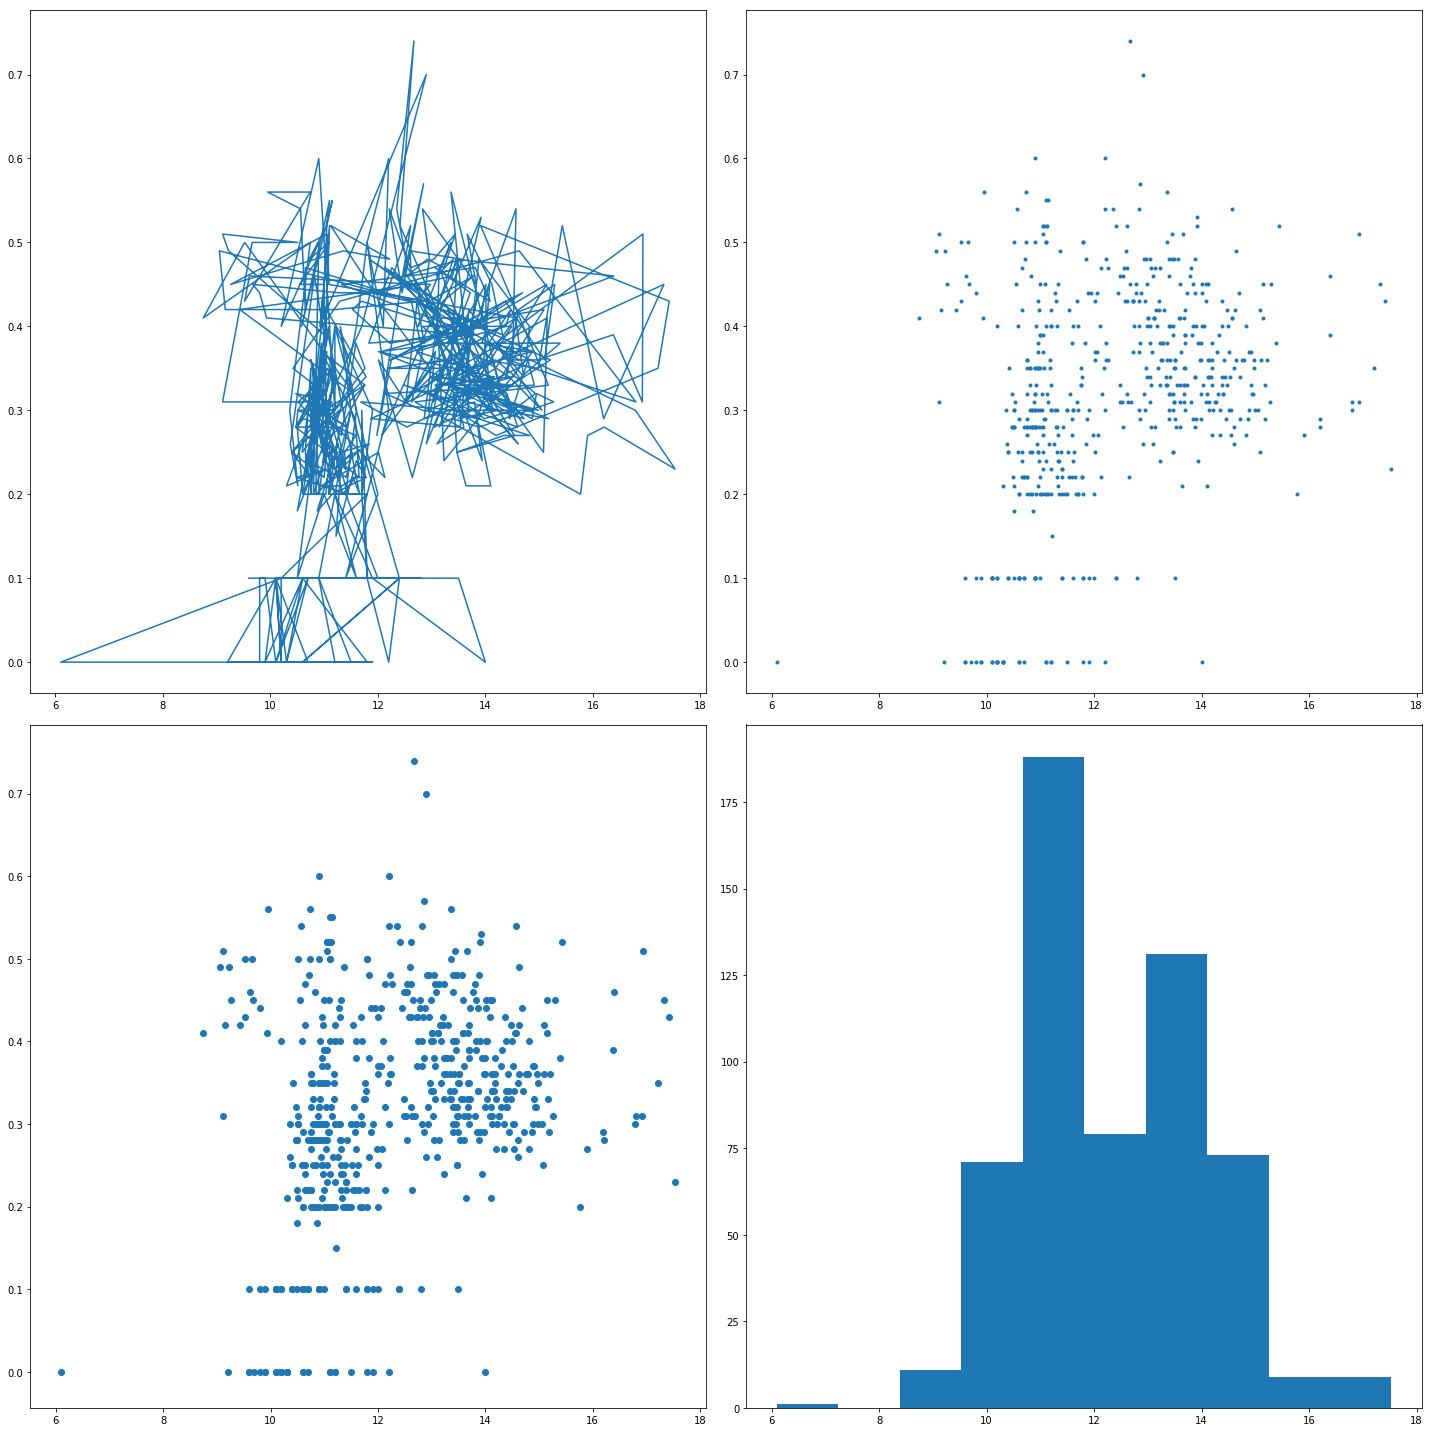

In [16]:
fig, axes=plt.subplots(figsize=(20,20), nrows=2, ncols=2)
axes[?][?].plot(df["palmitic"], df["linolenic"])
axes[?][?].plot(df["palmitic"], df["linolenic"], '.')
axes[?][?].scatter(df["palmitic"], df["linolenic"])
axes[?][?].hist(df["palmitic"])
fig.tight_layout()



# Try) xacids=['oleic','linolenic','eicosenoic'], yacids=['stearic','arachidic'] 을 가지고 각기 xacids-yacids의 scatter plot를 그리기
Tip) subplot에서 nrows = len(xacids), ncols = len(yacids)
Tip) 위의 각기 컬럼들을 리스트로 가지고 있으니, for를 활용하여 6개의 그래프를 쉽게 생성하는 방법을 사용하자. 2중 for loop


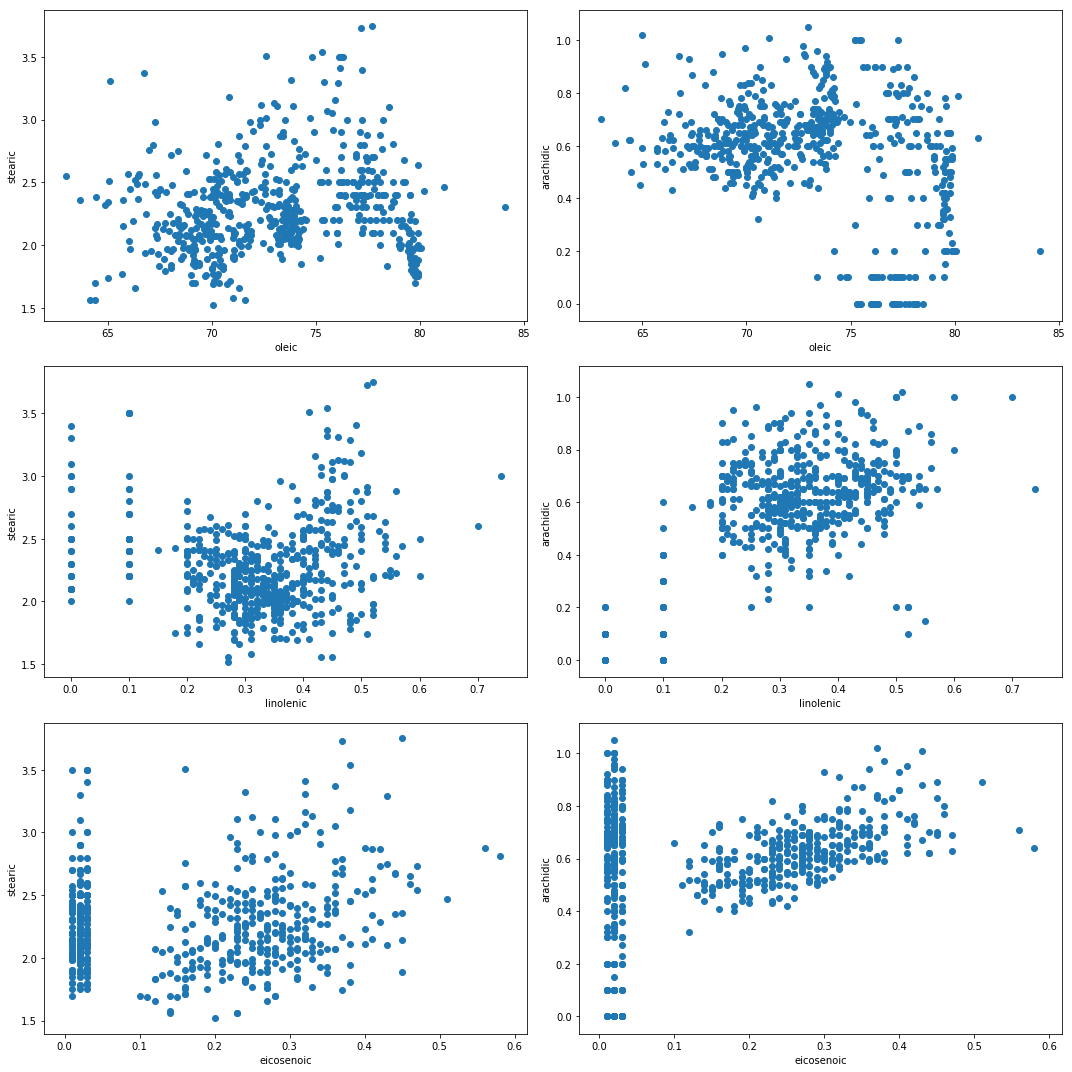

In [17]:
xacids=['oleic','linolenic','eicosenoic']
yacids=['stearic','arachidic']

fig, axes=plt.subplots(figsize=(15,15), nrows=len(xacids), ncols=len(yacids))
for i, xacid in enumerate(xacids):
    for j, yacid in enumerate(yacids):
        axes[i][j].scatter(df[xacid],df[yacid])
        axes[i][j].set_xlabel(xacid)
        axes[i][j].set_ylabel(yacid)
fig.tight_layout()


# Try) groupby를 활용하여 region을 기준으로 묶어서 region_groupby객체로 생성
Tip) region_groupby = df.groupby(~~~~)

In [50]:
region_groupby = df.groupby(["region"])
region_groupby
# key-value구조라서 바로 보이지 않음;;;

In [51]:
region_groupby.head()

,areaID,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,North-Apulia,1,1,10.75,0.75,2.26,78.23,6.72,0.36,0.60,0.29
1,North-Apulia,1,1,10.88,0.73,2.24,77.09,7.81,0.31,0.61,0.29
2,North-Apulia,1,1,9.11,0.54,2.46,81.13,5.49,0.31,0.63,0.29
3,North-Apulia,1,1,9.66,0.57,2.40,79.52,6.19,0.50,0.78,0.35
4,North-Apulia,1,1,10.51,0.67,2.59,77.71,6.72,0.50,0.80,0.46
323,Inland-Sardinia,2,5,11.29,1.20,2.22,72.72,11.12,0.43,0.98,0.02
324,Inland-Sardinia,2,5,10.42,1.35,2.10,73.76,11.16,0.35,0.90,0.03
325,Inland-Sardinia,2,5,11.03,0.96,2.10,73.80,10.85,0.32,0.94,0.03
326,Inland-Sardinia,2,5,11.18,0.97,2.21,72.79,11.54,0.35,0.94,0.02
327,Inland-Sardinia,2,5,10.52,0.95,2.15,73.88,11.26,0.31,0.92,0.01


# region_groupby 에 describe() 메소드 적용

In [52]:
dfrd=region_groupby.describe()
dfrd.head(20)


area                                              palmitic  \
        count      mean       std  min  25%  50%  75%  max    count   
region                                                                
1       323.0  2.783282  0.741054  1.0  2.5  3.0  3.0  4.0    323.0   
2        98.0  5.336735  0.475023  5.0  5.0  5.0  6.0  6.0     98.0   
3       151.0  8.006623  0.820542  7.0  7.0  8.0  9.0  9.0    151.0   

                   ... arachidic       eicosenoic                            \
             mean  ...       75%   max      count      mean       std   min   
region             ...                                                        
1       13.322879  ...     0.690  1.02      323.0  0.273220  0.083915  0.10   
2       11.113469  ...     0.810  1.05       98.0  0.019388  0.007436  0.01   
3       10.948013  ...     0.595  1.00      151.0  0.019735  0.007298  0.01   

                                 
         25%   50%    75%   max  
region                           
1       0.22  0.27  0.320  0.58  
2       0.01  0.02  0.020  0.03  
3       0.01  0.02  0.025  0.03  

[3 rows x 72 columns]

# region_groupby에 mean, std 등 기타 메소드 적용

In [53]:
region_groupby.mean()

,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
region,,,,,,,,,
1,2.783282,13.322879,1.548019,2.287740,71.000093,10.334985,0.380650,0.631176,0.273220
2,5.336735,11.113469,0.967449,2.261837,72.680204,11.965306,0.270918,0.731735,0.019388
3,8.006623,10.948013,0.837351,2.308013,77.930530,7.270331,0.217881,0.375762,0.019735


In [54]:
region_groupby.apply(lambda x: x.mean())
# 참고)키-벨류에 의해서..위와 달리 region이 다시 컬럼에 있음.

,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
region,,,,,,,,,,
1,1.0,2.783282,13.322879,1.548019,2.287740,71.000093,10.334985,0.380650,0.631176,0.273220
2,2.0,5.336735,11.113469,0.967449,2.261837,72.680204,11.965306,0.270918,0.731735,0.019388
3,3.0,8.006623,10.948013,0.837351,2.308013,77.930530,7.270331,0.217881,0.375762,0.019735


In [23]:
region_groupby.std()

,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
region,,,,,,,,,
1,0.741054,1.529349,0.507237,0.398709,3.451431,2.106730,0.079727,0.111644,0.083915
2,0.475023,0.404111,0.138514,0.176363,1.418783,1.072336,0.053844,0.118826,0.007436
3,0.820542,0.825635,0.264388,0.389560,1.648155,1.431226,0.168865,0.293586,0.007298


# region 1/2/3에 해당하는 값이 - 'South','Sardinia','North'이니, 이에 대한 맵핑된 dict가 필요함

In [56]:
rkeys=[1,2,3]
rvals=['South','Sardinia','North']
rmap={e[0]:e[1] for e in zip(rkeys,rvals)}
rmap

{1: 'South', 2: 'Sardinia', 3: 'North'}

# Try) region으로 groupby하고 나서, mean을 구하기
# 단, 전체 컬럼이 아니라 acidlist 에 해당하는 컬럼만 추릴것.

In [25]:
mdf2=df.groupby('region').mean()
mdf2=mdf2[acidlist]
mdf2.head()

,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
region,,,,,,,,
1,13.322879,1.548019,2.287740,71.000093,10.334985,0.380650,0.631176,0.273220
2,11.113469,0.967449,2.261837,72.680204,11.965306,0.270918,0.731735,0.019388
3,10.948013,0.837351,2.308013,77.930530,7.270331,0.217881,0.375762,0.019735


# Try) barh 그래프 그리기

(0, 100)

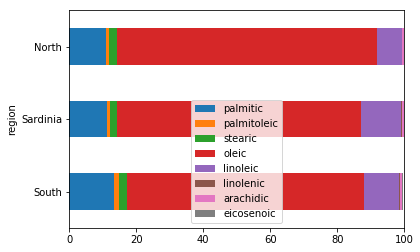

In [26]:
ax=mdf2.plot(kind='barh', stacked=True)
ax.set_yticklabels(rvals)
ax.set_xlim([0,100])


# region별로 linoleic - arachidic scatter그래프

In [27]:
def regionSca(df, scatterx, scattery, by="region", labeler={}):
    figure=plt.figure(figsize=(8,8))
    ax=plt.gca()
    cs=list(np.linspace(0,1,len(df.groupby(by))))
    xlimsd={}
    ylimsd={}
    xs={}
    ys={}
    cold={}
    # 단 이것은 region이 3가지로 구분되어 있어서 임...
    c=["red","blue","green"]
    for k,g in df.groupby(by):
        col=cs.pop()
        x=g[scatterx]
        y=g[scattery]
        xs[k]=x
        ys[k]=y
        cold[k]=c
        ax.scatter(x, y, c=c[k-1],label=labeler.get(k,k), s=40, alpha=0.4);
        xlimsd[k]=ax.get_xlim()
        ylimsd[k]=ax.get_ylim()
    xlims=[min([xlimsd[k][0] for k in xlimsd.keys()]), max([xlimsd[k][1] for k in xlimsd.keys()])]
    ylims=[min([ylimsd[k][0] for k in ylimsd.keys()]), max([ylimsd[k][1] for k in ylimsd.keys()])]
    ax.set_xlim(xlims)
    ax.set_ylim(ylims)
    ax.set_xlabel(scatterx)
    ax.set_ylabel(scattery)
    ax.grid(False)
    return ax

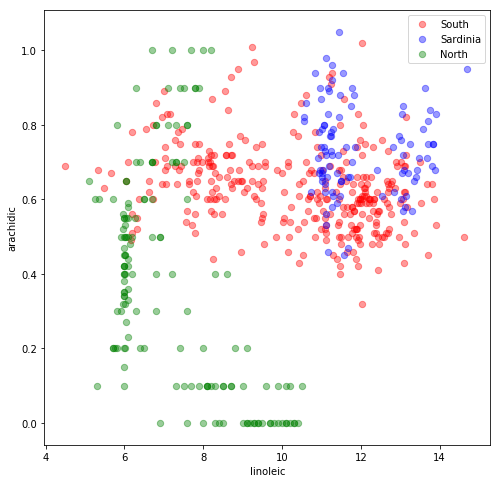

In [28]:
a=regionSca(df, "linoleic","arachidic", labeler=rmap)
a.legend(loc='upper right');